In [3]:
!pip install nltk
!pip install textblob
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Basic Libraries
import pandas as pd
import numpy as np
import re
import string

# NLP Tools
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Display tools
from IPython.display import display

# Load Dataset
df = pd.read_csv("HINGLISH_DATASET_SID.csv")



# Preview
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phbor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Source.Name,Column1,Column2,Date,Likes,Comment,(view source),Post ID,Label,Hate_Label
0,PostID 01 instagram-comments66804c78ca6bc-BxOs...,1.0,NaN,11-05-2019 15:43,NaN,Nice buro yes I am Hussain khan is me happy ow...,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS0',NaN
1,PostID 01 instagram-comments66804c78ca6bc-BxOs...,NaN,01-Jan,13-04-2021 07:27,1.0,@hussainkhansadab teri maa chodate,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS1',NaN
2,PostID 01 instagram-comments66804c78ca6bc-BxOs...,NaN,01-Feb,04-07-2021 17:04,2.0,@hussainkhansadab mohhamad and allah mi maa ki...,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS1',NaN
3,PostID 01 instagram-comments66804c78ca6bc-BxOs...,NaN,01-Mar,30-12-2021 05:29,0.0,@hussainkhansadab Teri maka bhosda lose nikalo...,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HSN',NaN
4,PostID 01 instagram-comments66804c78ca6bc-BxOs...,2.0,NaN,14-05-2019 03:30,NaN,Send me,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS0',NaN


In [33]:
# Keep only required columns or the coloumns that are useful for us
df = df[['Date', 'Likes', 'Comment', 'Label']].dropna()

KeyError: "['Label'] not in index"

In [6]:
df.head(10)

,Date,Likes,Comment
1,13-04-2021 07:27,1.0,@hussainkhansadab teri maa chodate
2,04-07-2021 17:04,2.0,@hussainkhansadab mohhamad and allah mi maa ki...
3,30-12-2021 05:29,0.0,@hussainkhansadab Teri maka bhosda lose nikalo...
5,28-02-2020 03:23,3.0,Bhn k lode katwe kaat k fenk denge bc tujhe suar
7,07-08-2020 07:26,1.0,Ye india ke sare muslman babar or akbar ki naj...
8,08-08-2020 06:53,1.0,Are thari maa ko chodu owesi bhadve
9,04-07-2021 17:01,1.0,@adult_story_90 chodo iski maa bhai akele owes...
10,11-10-2020 07:44,2.0,Teri maa ki chut
11,12-11-2020 09:42,4.0,Madar chod owesi👎👎👎👎👎🖕🖕🖕
12,08-12-2020 15:09,4.0,owesi ki maa kaa cholaaa


In [7]:
# Stopwords 
stop_words = set(stopwords.words('english'))

def clean_comment(text):  #I have declared a function here 
    # Lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    
    # Remove emojis and non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join cleaned tokens
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [8]:
# Apply preprocessing to Comment column
df['Cleaned_Comment'] = df['Comment'].apply(clean_comment)

# Preview cleaned data
df[['Comment', 'Cleaned_Comment']].head(10)





,Comment,Cleaned_Comment
1,@hussainkhansadab teri maa chodate,teri maa chodate
2,@hussainkhansadab mohhamad and allah mi maa ki...,mohhamad allah mi maa ki choot
3,@hussainkhansadab Teri maka bhosda lose nikalo...,teri maka bhosda lose nikalo madar chod
5,Bhn k lode katwe kaat k fenk denge bc tujhe suar,bhn k lode katwe kaat k fenk denge bc tujhe suar
7,Ye india ke sare muslman babar or akbar ki naj...,ye india ke sare muslman babar akbar ki najaya...
8,Are thari maa ko chodu owesi bhadve,thari maa ko chodu owesi bhadve
9,@adult_story_90 chodo iski maa bhai akele owes...,chodo iski maa bhai akele owesi nai sub mullo ...
10,Teri maa ki chut,teri maa ki chut
11,Madar chod owesi👎👎👎👎👎🖕🖕🖕,madar chod owesi
12,owesi ki maa kaa cholaaa,owesi ki maa kaa cholaaa


In [9]:
df.head(10)

,Date,Likes,Comment,Cleaned_Comment
1,13-04-2021 07:27,1.0,@hussainkhansadab teri maa chodate,teri maa chodate
2,04-07-2021 17:04,2.0,@hussainkhansadab mohhamad and allah mi maa ki...,mohhamad allah mi maa ki choot
3,30-12-2021 05:29,0.0,@hussainkhansadab Teri maka bhosda lose nikalo...,teri maka bhosda lose nikalo madar chod
5,28-02-2020 03:23,3.0,Bhn k lode katwe kaat k fenk denge bc tujhe suar,bhn k lode katwe kaat k fenk denge bc tujhe suar
7,07-08-2020 07:26,1.0,Ye india ke sare muslman babar or akbar ki naj...,ye india ke sare muslman babar akbar ki najaya...
8,08-08-2020 06:53,1.0,Are thari maa ko chodu owesi bhadve,thari maa ko chodu owesi bhadve
9,04-07-2021 17:01,1.0,@adult_story_90 chodo iski maa bhai akele owes...,chodo iski maa bhai akele owesi nai sub mullo ...
10,11-10-2020 07:44,2.0,Teri maa ki chut,teri maa ki chut
11,12-11-2020 09:42,4.0,Madar chod owesi👎👎👎👎👎🖕🖕🖕,madar chod owesi
12,08-12-2020 15:09,4.0,owesi ki maa kaa cholaaa,owesi ki maa kaa cholaaa


In [10]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

In [11]:
# Set seed for reproducibility
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Apply language detection
df['Language'] = df['Cleaned_Comment'].apply(detect_language)

# Preview result
df[['Cleaned_Comment', 'Language']].head(10)

# Information - en, hi, ta, bn, te, etc. for English, Hindi, Tamil, Bengali, Telugu.

,Cleaned_Comment,Language
1,teri maa chodate,et
2,mohhamad allah mi maa ki choot,so
3,teri maka bhosda lose nikalo madar chod,sl
5,bhn k lode katwe kaat k fenk denge bc tujhe suar,nl
7,ye india ke sare muslman babar akbar ki najaya...,id
8,thari maa ko chodu owesi bhadve,so
9,chodo iski maa bhai akele owesi nai sub mullo ...,pl
10,teri maa ki chut,sw
11,madar chod owesi,cy
12,owesi ki maa kaa cholaaa,so


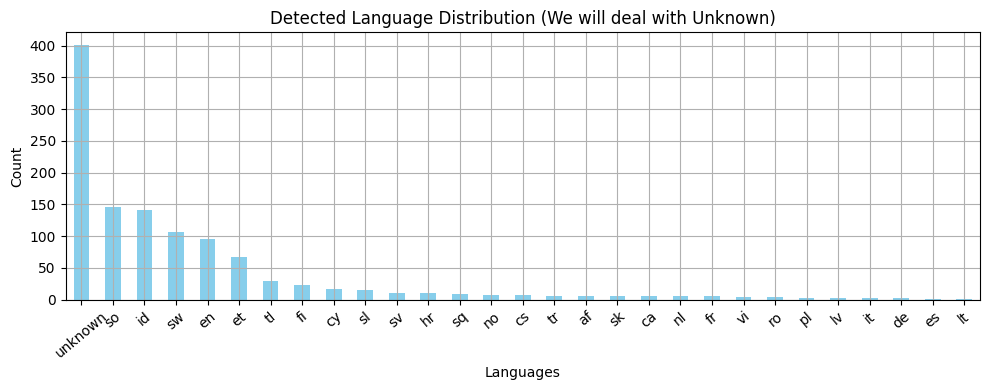

In [12]:
import matplotlib.pyplot as plt

# Plot language distribution
lang_counts = df['Language'].value_counts()
lang_counts.plot(kind='bar', color='skyblue', figsize=(10, 4), title='Detected Language Distribution (We will deal with Unknown)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.xticks(rotation=40)
plt.grid(True)
plt.tight_layout()
plt.show()

# we will be dealing with unknown language here


In [13]:
from textblob import TextBlob

def get_sentiment(text, lang):
    if lang == 'en':
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return "positive"
        elif polarity < -0.1:
            return "negative"
        else:
            return "neutral"
    else:
        return "neutral"  # Placeholder for multilingual handling

# Apply sentiment
df['Sentiment'] = df.apply(lambda x: get_sentiment(x['Cleaned_Comment'], x['Language']), axis=1)

# Preview
df[['Cleaned_Comment', 'Language', 'Sentiment']].head(10)
# as we see the sentimental analysis failed here as the language is in Hinglish

,Cleaned_Comment,Language,Sentiment
1,teri maa chodate,et,neutral
2,mohhamad allah mi maa ki choot,so,neutral
3,teri maka bhosda lose nikalo madar chod,sl,neutral
5,bhn k lode katwe kaat k fenk denge bc tujhe suar,nl,neutral
7,ye india ke sare muslman babar akbar ki najaya...,id,neutral
8,thari maa ko chodu owesi bhadve,so,neutral
9,chodo iski maa bhai akele owesi nai sub mullo ...,pl,neutral
10,teri maa ki chut,sw,neutral
11,madar chod owesi,cy,neutral
12,owesi ki maa kaa cholaaa,so,neutral


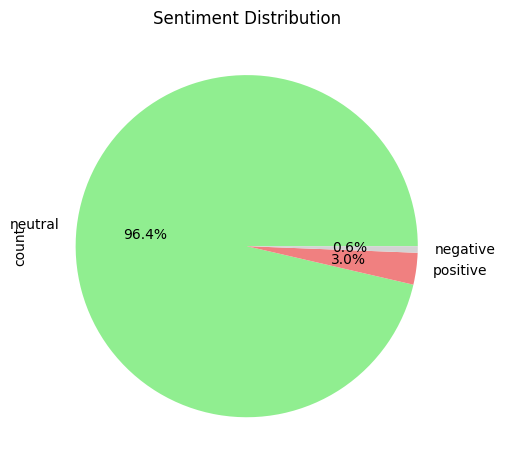

In [14]:
# Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgray'], title='Sentiment Distribution')
plt.tight_layout()
plt.show()


In [15]:
print("Positive Sentiment Comments:")
positive_comments = df[df['Sentiment'] == 'positive'][['Cleaned_Comment', 'Language', 'Likes', 'Date']]
display(positive_comments.head(10))  


Positive Sentiment Comments:


,Cleaned_Comment,Language,Likes,Date
758,gave answers calm way thats really amazing,en,4.0,19-01-2024 10:17
845,background sound ko kam kijiye voice isnt audi...,en,3.0,19-01-2024 18:14
975,man responsible downfall shivsena,en,0.0,22-01-2024 18:01
1531,right jco sab,en,1.0,26-03-2024 02:44
6331,proud hindu,en,11.0,19-06-2024 14:15
6535,proud hindu,en,1.0,19-06-2024 15:05
6681,proud hindu,en,1.0,19-06-2024 15:45
6796,jay shree ram proud hindu,en,1.0,19-06-2024 16:19
6957,peaceful word,en,23.0,19-06-2024 17:00
7078,proud hindu,en,9.0,19-06-2024 17:25


In [16]:
print(" Negative Sentiment Comments:")
negative_comments = df[df['Sentiment'] == 'negative'][['Cleaned_Comment', 'Language', 'Likes', 'Date']]
display(negative_comments.head(10))  


 Negative Sentiment Comments:


,Cleaned_Comment,Language,Likes,Date
1492,sorry bulwao bhai isse,en,0.0,16-03-2024 05:52
3704,please tag random sena,en,1.0,17-03-2024 12:12
5547,please tag random sena,en,1.0,10-04-2024 10:03
7641,edited video guys spreading hate,en,1.0,19-06-2024 20:45
7738,muslim totally wrong religion said,en,1.0,19-06-2024 22:01
8333,bc religion hate,en,1.0,20-06-2024 03:56
8608,sorry bro,en,1.0,23-06-2024 10:15


In [17]:
# Most liked negative comments
display(negative_comments.sort_values(by='Likes', ascending=False).head(10))

# Most liked positive comments
display(positive_comments.sort_values(by='Likes', ascending=False).head(10))

#people tend tio like more positive comments compared to negative one


,Cleaned_Comment,Language,Likes,Date
3704,please tag random sena,en,1.0,17-03-2024 12:12
5547,please tag random sena,en,1.0,10-04-2024 10:03
7641,edited video guys spreading hate,en,1.0,19-06-2024 20:45
7738,muslim totally wrong religion said,en,1.0,19-06-2024 22:01
8333,bc religion hate,en,1.0,20-06-2024 03:56
8608,sorry bro,en,1.0,23-06-2024 10:15
1492,sorry bulwao bhai isse,en,0.0,16-03-2024 05:52


,Cleaned_Comment,Language,Likes,Date
7410,proud hindu,en,99.0,19-06-2024 18:36
6957,peaceful word,en,23.0,19-06-2024 17:00
6331,proud hindu,en,11.0,19-06-2024 14:15
7078,proud hindu,en,9.0,19-06-2024 17:25
8242,proud hindu,en,5.0,20-06-2024 03:32
758,gave answers calm way thats really amazing,en,4.0,19-01-2024 10:17
9743,proud hindu,en,3.0,23-06-2024 07:17
8619,tumhare bhagwan ko main kuch bolu ga tumhe bor...,en,3.0,23-06-2024 06:50
8474,omg really today felt proud hindu,en,3.0,20-06-2024 11:07
845,background sound ko kam kijiye voice isnt audi...,en,3.0,19-01-2024 18:14


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


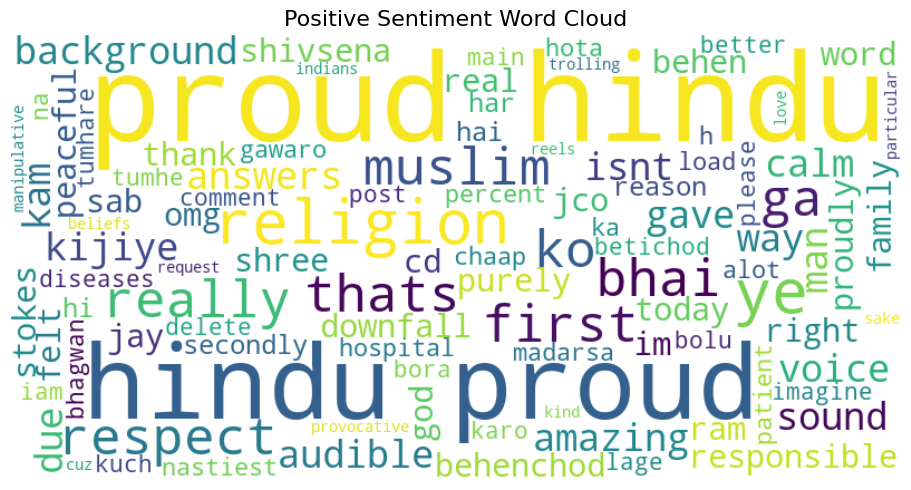

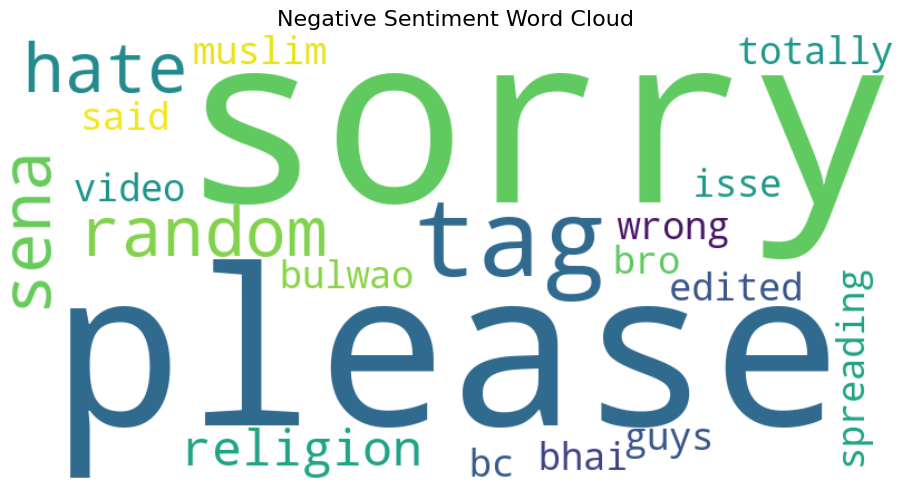

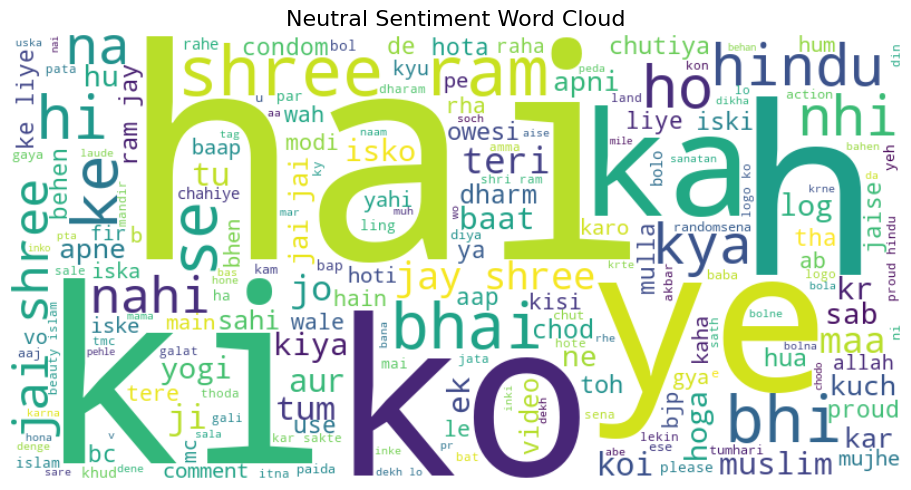

In [19]:
# Positive WordCloud
generate_wordcloud(df[df['Sentiment'] == 'positive']['Cleaned_Comment'], "Positive Sentiment Word Cloud")

# Negative WordCloud
generate_wordcloud(df[df['Sentiment'] == 'negative']['Cleaned_Comment'], "Negative Sentiment Word Cloud")

# Neutral WordCloud
generate_wordcloud(df[df['Sentiment'] == 'neutral']['Cleaned_Comment'], "Neutral Sentiment Word Cloud")


In [20]:
# giving custom stopwords
custom_stopwords = {
    'positive': {'hindu', 'proud', 'jco', 'isnt', 'im'},
    'negative': {'muslim', 'sena'},
    'neutral': {'hai', 'ka', 'ko', 'ki', 'hi', 'se', 'bhai', 'kr', 'hu', 'kya', 'kisi', 'kuch','ye', 'h'}
}


In [21]:
def generate_custom_wordcloud(text_series, title, sentiment_type):
    text = ' '.join(text_series)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords.get(sentiment_type, set())
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


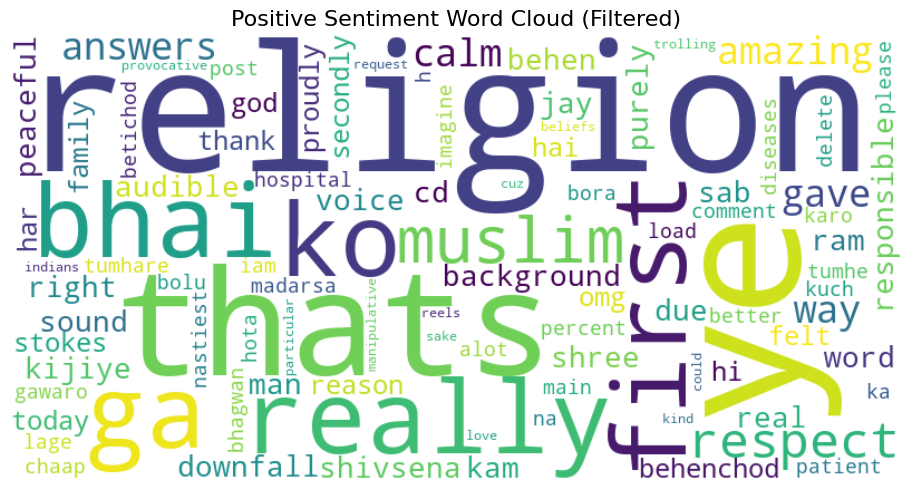

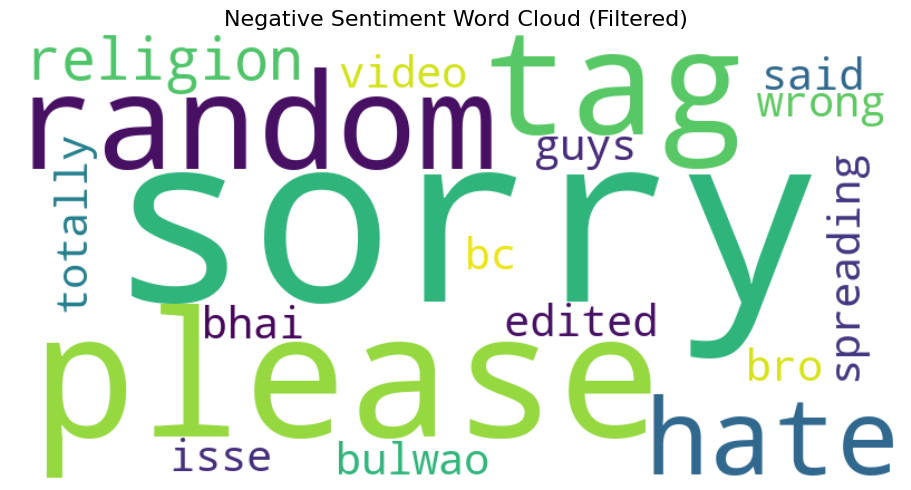

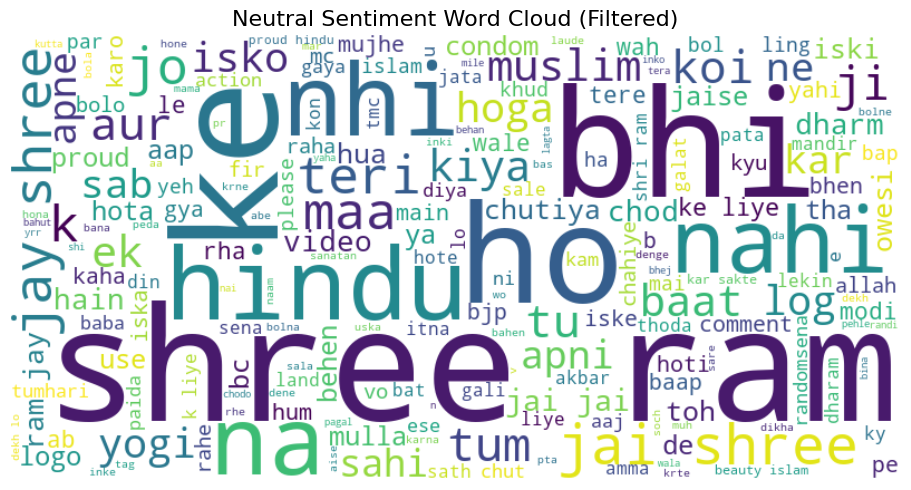

In [22]:
# Positive WordCloud
generate_custom_wordcloud(df[df['Sentiment'] == 'positive']['Cleaned_Comment'], 
                          "Positive Sentiment Word Cloud (Filtered)", 
                          'positive')

# Negative WordCloud
generate_custom_wordcloud(df[df['Sentiment'] == 'negative']['Cleaned_Comment'], 
                          "Negative Sentiment Word Cloud (Filtered)", 
                          'negative')

# Neutral WordCloud
generate_custom_wordcloud(df[df['Sentiment'] == 'neutral']['Cleaned_Comment'], 
                          "Neutral Sentiment Word Cloud (Filtered)", 
                          'neutral')


In [28]:
df.head(10)

,Date,Likes,Comment,Cleaned_Comment,Language,Sentiment
1,13-04-2021 07:27,1.0,@hussainkhansadab teri maa chodate,teri maa chodate,et,neutral
2,04-07-2021 17:04,2.0,@hussainkhansadab mohhamad and allah mi maa ki...,mohhamad allah mi maa ki choot,so,neutral
3,30-12-2021 05:29,0.0,@hussainkhansadab Teri maka bhosda lose nikalo...,teri maka bhosda lose nikalo madar chod,sl,neutral
5,28-02-2020 03:23,3.0,Bhn k lode katwe kaat k fenk denge bc tujhe suar,bhn k lode katwe kaat k fenk denge bc tujhe suar,nl,neutral
7,07-08-2020 07:26,1.0,Ye india ke sare muslman babar or akbar ki naj...,ye india ke sare muslman babar akbar ki najaya...,id,neutral
8,08-08-2020 06:53,1.0,Are thari maa ko chodu owesi bhadve,thari maa ko chodu owesi bhadve,so,neutral
9,04-07-2021 17:01,1.0,@adult_story_90 chodo iski maa bhai akele owes...,chodo iski maa bhai akele owesi nai sub mullo ...,pl,neutral
10,11-10-2020 07:44,2.0,Teri maa ki chut,teri maa ki chut,sw,neutral
11,12-11-2020 09:42,4.0,Madar chod owesi👎👎👎👎👎🖕🖕🖕,madar chod owesi,cy,neutral
12,08-12-2020 15:09,4.0,owesi ki maa kaa cholaaa,owesi ki maa kaa cholaaa,so,neutral
